<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/Car_number_detection_Project_ipynb%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/JavohirJalilov/OpenCV/raw/master/CARS/CAR_IMG_600X600.zip

--2023-09-19 18:07:50--  https://github.com/JavohirJalilov/OpenCV/raw/master/CARS/CAR_IMG_600X600.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JavohirJalilov/OpenCV/master/CARS/CAR_IMG_600X600.zip [following]
--2023-09-19 18:07:50--  https://raw.githubusercontent.com/JavohirJalilov/OpenCV/master/CARS/CAR_IMG_600X600.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11239641 (11M) [application/zip]
Saving to: ‘CAR_IMG_600X600.zip’

CAR_IMG_600X600.zip 100%[===================>]  10.72M  --.-KB/s    in 0.04s   

2023-09-19 18:07:50 (289 MB/s) - ‘CAR_IMG_600X600.zip’ saved [11239641/112396

In [ ]:
!unzip CAR_IMG_600X600.zip

Archive:  CAR_IMG_600X600.zip
   creating: CAR_IMG_600X600/
  inflating: CAR_IMG_600X600/img03.png  
  inflating: CAR_IMG_600X600/img01.png  
  inflating: CAR_IMG_600X600/img02.png  
  inflating: CAR_IMG_600X600/img04.png  
  inflating: CAR_IMG_600X600/img06.png  
  inflating: CAR_IMG_600X600/img08.png  
  inflating: CAR_IMG_600X600/img11.png  
  inflating: CAR_IMG_600X600/img13.png  
  inflating: CAR_IMG_600X600/img14.png  
  inflating: CAR_IMG_600X600/img16.png  
  inflating: CAR_IMG_600X600/img17.png  
  inflating: CAR_IMG_600X600/img19.png  
  inflating: CAR_IMG_600X600/img09.png  
  inflating: CAR_IMG_600X600/img05.png  
  inflating: CAR_IMG_600X600/img07.png  
  inflating: CAR_IMG_600X600/img12.png  
  inflating: CAR_IMG_600X600/img10.png  
  inflating: CAR_IMG_600X600/img18.png  
  inflating: CAR_IMG_600X600/img15.png  
  inflating: CAR_IMG_600X600/img20.png  
  inflating: CAR_IMG_600X600/img21.png  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [ ]:
def show(img,s=8):
  plt.figure(figsize=(s,s))
  plt.imshow(img,cmap='gray')
  plt.show()

In [ ]:
def get_img(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

In [ ]:
def kernal(x,y):
  k = np.ones((x,y),dtype=np.uint8)
  return k

In [ ]:
def max_index(contours):
  area_list = []
  for i in range(len(contours)):
    area_list.append(cv2.contourArea(contours[i]))

  area_list = np.array(area_list)
  max_idx = area_list.argmax()
  return max_idx

In [ ]:
def license_detection(image):

  H,W = image.shape[:2]

  ROI = np.zeros(image.shape,dtype=np.uint8)
  ROI = cv2.rectangle(ROI,(0,H//2),(W,H),(255,255,255),-1)
  img = cv2.bitwise_and(image,ROI)

  adge = cv2.Canny(img,350,400)
  mask = cv2.morphologyEx(adge,cv2.MORPH_CLOSE,kernal(9,9))
  mask = cv2.dilate(mask,kernal(5,5))
  mask = cv2.erode(mask,kernal(6,6))

  contours,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  max_idx = max_index(contours)
  x,y,w,h = cv2.boundingRect(contours[max_idx])
  return x,y,w,h

In [ ]:
def drawing_licence_plate(path_list):
  plt.figure(figsize=(10,5),dpi=200)
  for i,path in enumerate(path_list):
    image = get_img(path)
    x,y,w,h = license_detection(image)
    image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

    plt.subplot(3,7,i+1)
    plt.imshow(image,cmap='gray')
  plt.show()

In [ ]:
def path_to_list(path):
  path_list = []
  for i in path_images:
    path_list.append(str(i))
  return path_list

In [ ]:
path_images = pathlib.Path('CAR_IMG_600X600').iterdir()

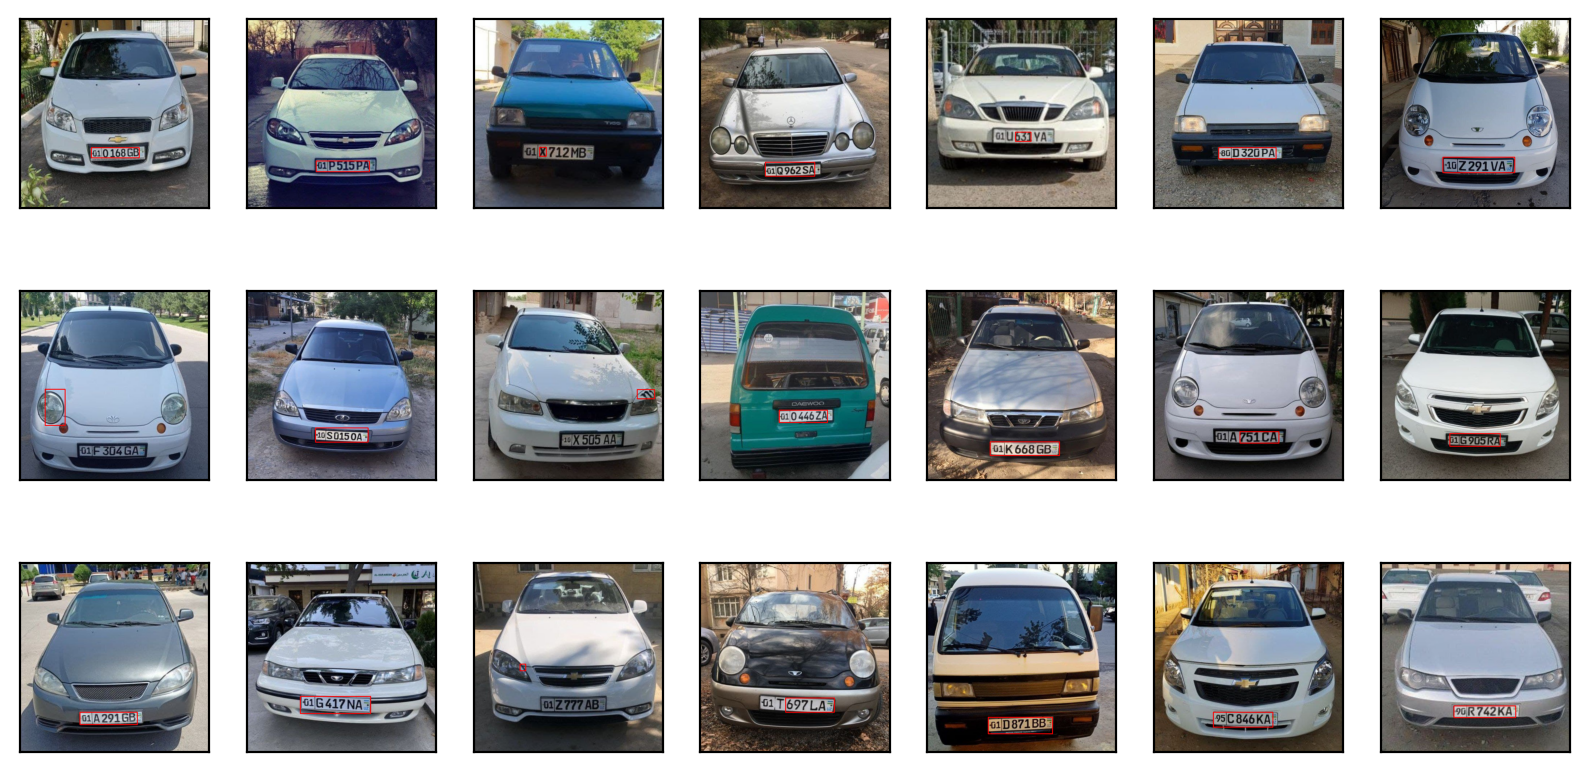

In [ ]:
path_list = path_to_list(path_images)
drawing_licence_plate(path_list)

In [ ]:
path_images = pathlib.Path('CAR_IMG_600X600').iterdir()
path_list = []

for i in path_images:
  path_list.append(str(i))

In [ ]:
path_list = sorted(path_list)

In [ ]:
print(path_list[0])

CAR_IMG_600X600/img01.png


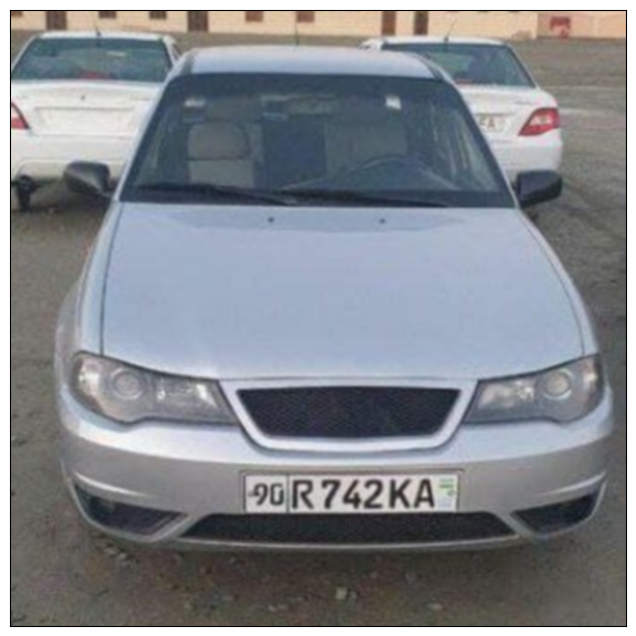

In [ ]:
img = get_img(path_list[13])
img = cv2.blur(img,(3,3))
show(img)

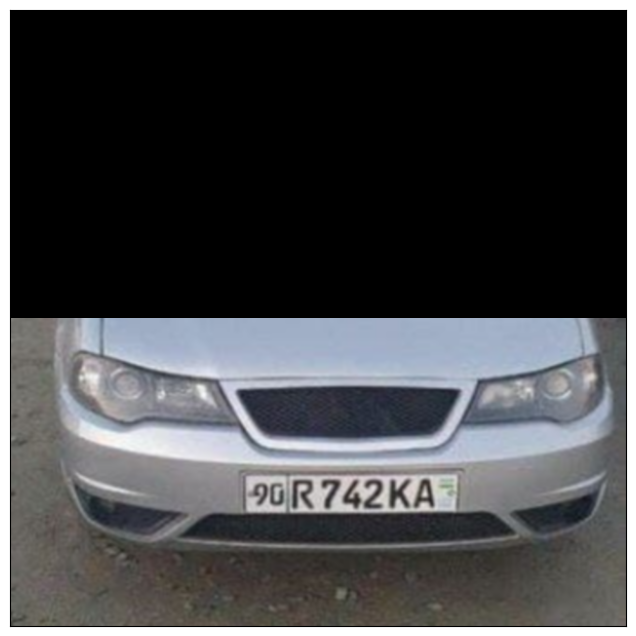

In [ ]:
H,W = img.shape[:2]

ROI = np.zeros(img.shape,dtype=np.uint8)
ROI = cv2.rectangle(ROI,(0,H//2),(W,H),(255,255,255),-1)
ROI_img = cv2.bitwise_and(img,ROI)
show(ROI_img)

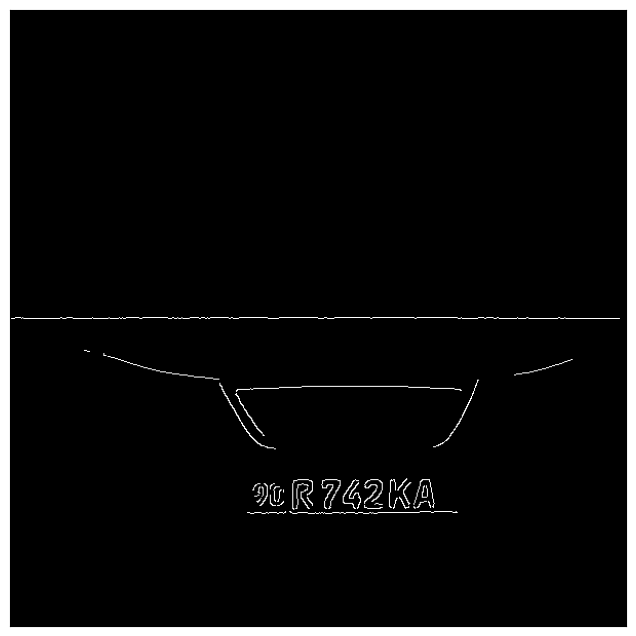

In [ ]:
adge = cv2.Canny(ROI_img,300,350)
show(adge)

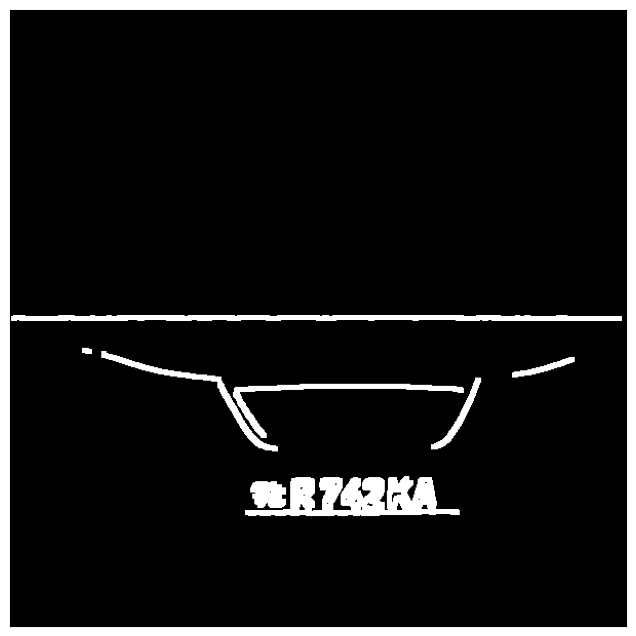

In [ ]:
mask = cv2.dilate(adge,kernal(5,5))
show(mask)

In [ ]:
contours,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
len(contours)

8

In [ ]:
area_list = []
for i in range(len(contours)):
  area_list.append(cv2.contourArea(contours[i]))

area_list = np.array(area_list)
max_idx = area_list.argmax()
print(max_idx)

1


209 39


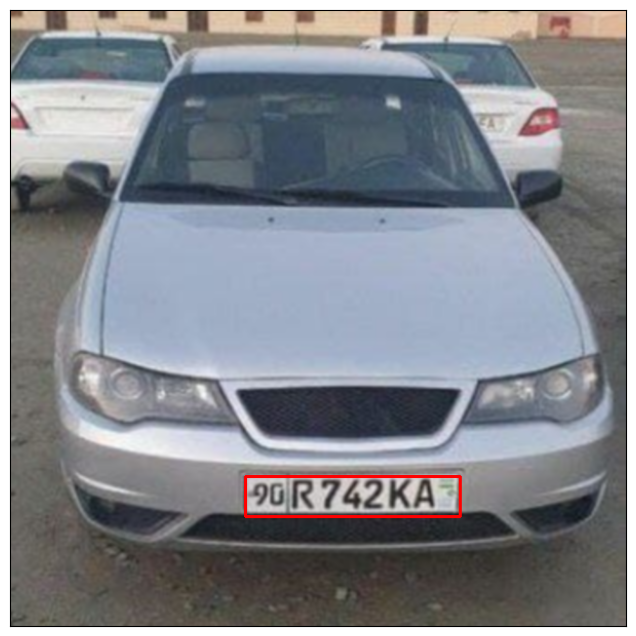

In [ ]:
car = img.copy()
x,y,w,h = cv2.boundingRect(contours[max_idx])
car = cv2.rectangle(car,(x,y),(x+w,y+h),(255,0,0),2)
img_w = cv2.cvtColor(car,cv2.COLOR_RGB2BGR)
cv2.imwrite('img_rgb.png',img_w)
print(w,h)
show(car)